Project Proposal


Introduction

Our group is going to use the dataset about the students’ knowledge status about the subject of Electrical DC Machines, this dataset includes data on students in a class on DC machines, where their the authors recorded their time spent studying DC machines, their time spent studying related topics, their exam performance on related topics as well as their exam performance on DC machines, at the end the authors classified the users by knowledge, either very low, low, medium or high. We will try to predict the variable the knowledge level of user (UNS) for new observations, based of the time spent studying DC machines and their exam performance on DC machines.  

In [58]:
library(tidyverse)
library(repr)
library(tidymodels)
library(readxl)

training_data <- read_excel("DSCI-project/Data_User_Modeling_Dataset.xlsx", sheet = 2)

tidy_data <- training_data |>
    select(STG:UNS) |>
    mutate(UNS = as_factor(UNS))



New names:
• `` -> `...7`
• `` -> `...8`


In [49]:
counts <- tidy_data |>
     count(UNS)

counts

UNS,n
<fct>,<int>
very_low,24
High,63
Low,83
Middle,88


In [50]:
predictor_variables <- select(tidy_data, STG, PEG)
mean_predictors  <- map_df(predictor_variables, mean)
mean_predictors

STG,PEG
<dbl>,<dbl>
0.3711473,0.4585388


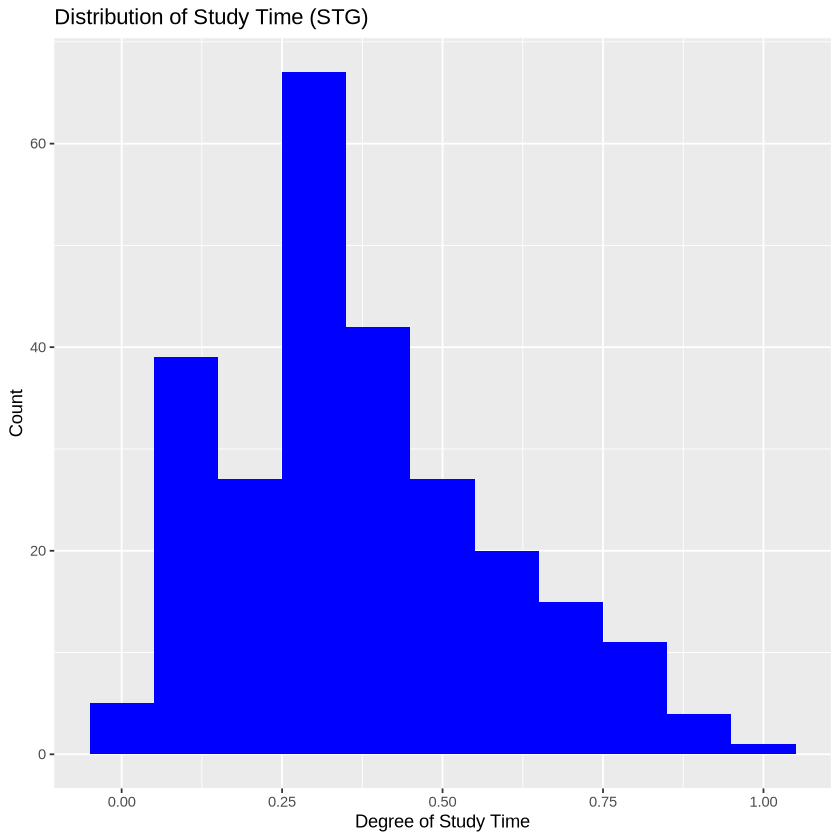

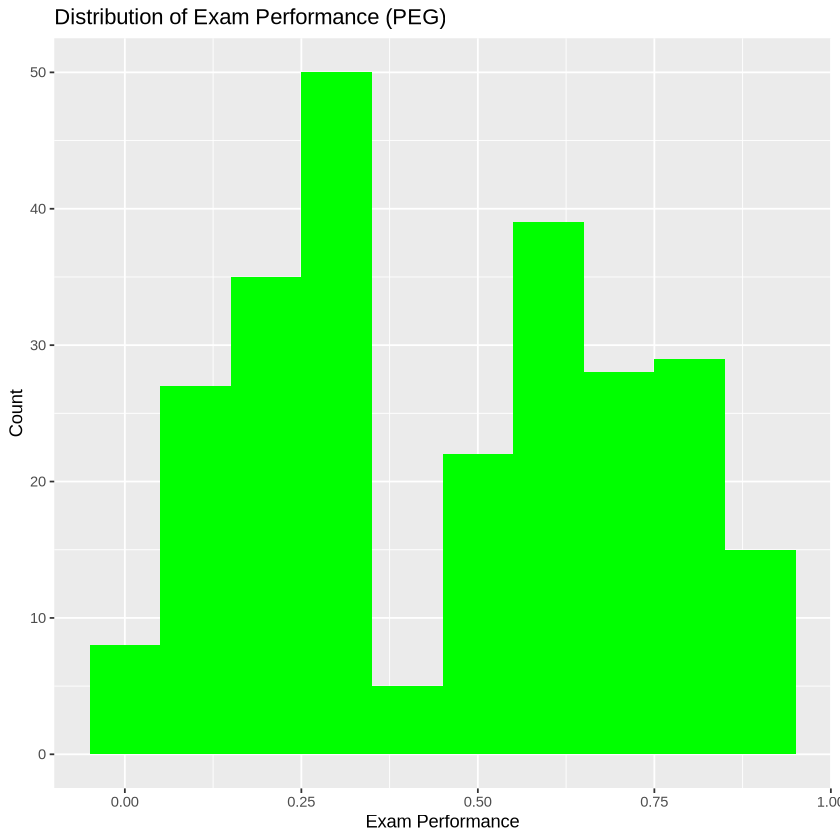

In [57]:
ggplot(tidy_data, aes(x = STG)) +
  geom_histogram(binwidth = 0.1, fill = "blue") +
  labs(title = "Distribution of Study Time (STG)", x = "Degree of Study Time", y = "Count")

ggplot(tidy_data, aes(x = PEG)) +
  geom_histogram(binwidth = 0.1, fill = "green") +
  labs(title = "Distribution of Exam Performance (PEG)", x = "Exam Performance", y = "Count")

Method 

Since the variable we want to predict UNS is a factor. We are going to perform the k-nearest neighbor classification on the data set. The dataset is already split into training data and testing data. We are going to use the parameters STG (The degree of study time for goal object materials) and PEG (The exam performance of users for goal objects) to classify the new data points and predict the value of UNS. From our visualization, they would influence the value of UNS. We plan to use the 5-fold-cross-validation to find out the best neighbors value for the k value. 



We plan to use a scatterplot to visualize our results with time spent studying on the x axis and exam performance on the y axis. Inside the scatterplot, we shall mark the points of different UNS values with different colors.


Expectations

When we have a new observation without a UNS value, we want to predict it’s UNS value correctly with the parameters STG and PEG.

The UNS is the value that the researchers want to find out (output value) by analysing the values of other parameters(input value). By doing this classification we would be able to predict a person’s UNS from STG and PEG. This will help us understand which factors contribute to people actually gaining and retaining knowledge on a subject, as well as showing people how we may more accurately predict peoples knowledge levels on various subjects

Further questions: Since the both STG and PEG can predict the UNS, is there any relationships between the two parameters? And if there is a pattern between STG and PEG, what is the reason?


